# 1. Libraries

In [42]:
import os
import shutil
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from collections import defaultdict
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 2. Preprocessing

## 2.1. Primero vamos a transformar todos nuestros archivos con la extension .txt para poder manipularlos

In [2]:
# Specify the path to the folder you want to process
src_folder = 'reuters/training'
# Specify the path to the destination folder
dest_folder = 'reuters/training_txt'

# Create the destination folder if it doesn't exist
os.makedirs(dest_folder, exist_ok=True)

# Iterate over all the files in the specified folder
for filename in os.listdir(src_folder):
    # Get the full path of the file
    src_file_path = os.path.join(src_folder, filename)
        
    # Define the destination file path with .txt extension
    dest_file_path = os.path.join(dest_folder, f"{filename}.txt")
    # Copy the file to the destination folder with .txt extension
    shutil.copy(src_file_path, dest_file_path)
print("Fixed file format")

Fixed file format


### 2.2. El siguiente paso es eliminar los caracteres especiales

In [10]:
# Directories
input_directory = 'reuters/training_txt'
output_directory = 'reuters/cleaned_txt'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Function to clean text
def clean_text(text):
    # Remove special characters using regex
    cleaned_text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return cleaned_text

# Process each file in the input directory
for filename in os.listdir(input_directory):
    with open(os.path.join(input_directory, filename), 'r', encoding='utf-8') as file:
        content = file.read()
        cleaned_content = clean_text(content)
    
    # Write the cleaned content to a new file in the output directory
    with open(os.path.join(output_directory, filename), 'w', encoding='utf-8') as output_file:
        output_file.write(cleaned_content)

print("All files have been processed and cleaned.")


All files have been processed and cleaned.


## 3. Creamos el Bag of Words con CountVectorizer de sklearn, y eliminamos las stopwords de ingles

In [11]:
# Step 1: Read all .txt files from the directory
directory = 'reuters/cleaned_txt'

filenames = []
all_sentences = []

for filename in os.listdir(directory):
    with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
        content = file.read()
        all_sentences.append(content)
        filenames.append(filename)


print(all_sentences)

# Step 3: Use CountVectorizer to vectorize the text data
# Each row represents a document.
# Each column represents a unique token (word) from the corpus.
# Each entry in the matrix represents the count of the token in the corresponding document.

vectorizer_bow = CountVectorizer(stop_words='english')
X_bow = vectorizer_bow.fit_transform(all_sentences)

terms_bow = vectorizer_bow.get_feature_names_out()


# Step 4: Print the resulting bag-of-words array
X_bow = X_bow.toarray()

['PHILIPPINES SEES 1987 GOVERNMENT REVENUE UP 26 PCT\n  Philippine government revenue is\n  expected to rise 26 pct to 999 billion pesos this year from\n  791 billion in 1986 Finance Secretary Jaime Ongpin said\n      In a report to President Corazon Aquino on his departments\n  performance during the year ended February 28 Ongpin said at\n  least 159 billion pesos were expected to accrue from new tax\n  reform measures announced last year\n      He said the goal for official development assistance ODA\n  this year is two billion dlrs adding that aid donors have\n  committed ODA inflows of 17 billion dlrs in 1987 up 30 pct\n  from 13 billion in 1986\n      Ongpin said steps planned to provide a sound revenue base\n  included a value added tax VAT system due to be introduced in\n  1988 He gave no other details\n      He said treasury bill maturities interest rate levels and\n  the volume of government securities sold to the private sector\n  have improved significantly In particular sho

In [12]:
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Cosine Similarity based on the BoW

In [24]:
# Vectorize the query
query = "NIPPON MINING LOWERS COPPER PRICE Nippon Mining Co Ltd said it lowered its selling price for electrolytic copper by 10,000 yen per tonne to 260,000, effective immediately."

In [ ]:
def get_top_n_documents_cosine(query, X_tfidf, vectorizer, filenames, n=10):
    query_vector = vectorizer.transform([query])
    cosine_sim_scores = cosine_similarity(X_tfidf, query_vector).flatten()

    similarity_df = pd.DataFrame({'Filename': filenames, 'Cosine_Similarity': cosine_sim_scores})
    similarity_df = similarity_df.sort_values(by='Cosine_Similarity', ascending=False)
    return similarity_df.head(n)['Filename'].tolist()


get_top_n_documents_cosine(query, X_tfidf_lemmatized, tfidf_vectorizer_lemmatized,n=10)
# Print the content of the top ten ranked documents
top_ten_filenames = similarity_df.head(10)['Filename'].tolist()

original_directory = 'reuters/training_txt'


for filename in top_ten_filenames:
    with open(os.path.join(original_directory, filename), 'r', encoding='utf-8') as file:
        content = file.read()
        print(f"Document: {filename}")
        print(content)
        print("\n")



In [25]:
def get_top_n_documents_cosine(query, n=10):
    query_vector = vectorizer_bow.transform([query])
    cosine_sim_scores = cosine_similarity(X_bow, query_vector).flatten()

    similarity_df = pd.DataFrame({'Filename': filenames, 'Cosine_Similarity': cosine_sim_scores})
    similarity_df = similarity_df.sort_values(by='Cosine_Similarity', ascending=False)
    return similarity_df.head(n)['Filename'].tolist()


get_top_n_documents_cosine(query, n=10)



# # Print the content of the top three ranked documents
# top_ten_filenames = similarity_df.head(10)['Filename'].tolist()

# original_directory = 'reuters/training_txt'


# for filename in top_ten_filenames:
#     with open(os.path.join(original_directory, filename), 'r', encoding='utf-8') as file:
#         content = file.read()
#         print(f"Document: {filename}")
#         print(content)
#         print("\n")

['14805.txt',
 '14499.txt',
 '12215.txt',
 '14476.txt',
 '12910.txt',
 '13694.txt',
 '22.txt',
 '12024.txt',
 '12223.txt',
 '11945.txt']

## Evaluate Cosine Similarity Model

1. Read cats.txt

In [30]:
# Read the categories file
categories_file = 'reuters/cats.txt'
doc_categories = {}

with open(categories_file, 'r', encoding='utf-8') as f:
    for line in f:
        parts = line.strip().split()
        filename = parts[0].split('/')[-1]  # Extract just the filename 
        categories = parts[1:]
        if 'training' in filename:  # Only include training files
            doc_categories[filename] = categories

In [31]:
doc_categories

{'training/1': ['cocoa'],
 'training/5': ['sorghum', 'oat', 'barley', 'corn', 'wheat', 'grain'],
 'training/6': ['wheat',
  'sorghum',
  'grain',
  'sunseed',
  'corn',
  'oilseed',
  'soybean',
  'sun-oil',
  'soy-oil',
  'lin-oil',
  'veg-oil'],
 'training/9': ['earn'],
 'training/10': ['acq'],
 'training/11': ['earn'],
 'training/12': ['acq', 'earn'],
 'training/13': ['earn'],
 'training/14': ['earn'],
 'training/18': ['earn'],
 'training/19': ['grain', 'wheat'],
 'training/22': ['copper'],
 'training/23': ['earn'],
 'training/24': ['earn'],
 'training/27': ['earn'],
 'training/29': ['housing'],
 'training/30': ['money-supply'],
 'training/36': ['earn'],
 'training/37': ['earn'],
 'training/38': ['earn'],
 'training/40': ['earn'],
 'training/41': ['earn'],
 'training/42': ['coffee'],
 'training/44': ['ship', 'acq'],
 'training/45': ['acq'],
 'training/46': ['sugar'],
 'training/47': ['trade'],
 'training/48': ['reserves'],
 'training/49': ['ship'],
 'training/50': ['earn'],
 'traini

2. Create Ground Truth Labels for Each Category

In [32]:
ground_truth = defaultdict(list)

for filename, categories in doc_categories.items():
    for category in categories:
        ground_truth[category].append(filename)

In [33]:
ground_truth

defaultdict(list,
            {'cocoa': ['training/1',
              'training/275',
              'training/2521',
              'training/3190',
              'training/3225',
              'training/3310',
              'training/4147',
              'training/4470',
              'training/5168',
              'training/5192',
              'training/5258',
              'training/5382',
              'training/5491',
              'training/5598',
              'training/5880',
              'training/6128',
              'training/6405',
              'training/6407',
              'training/6414',
              'training/6493',
              'training/7071',
              'training/7311',
              'training/8326',
              'training/8850',
              'training/8961',
              'training/8978',
              'training/9450',
              'training/9559',
              'training/9903',
              'training/9953',
              'training/10014',
              '

3. Generate predictions for each category

In [34]:
# Generate predictions for each category
top_n = 10
predictions_cosine = {category: get_top_n_documents_cosine(category, top_n) for category in ground_truth.keys()}

In [36]:
predictions_cosine

{'cocoa': ['10505.txt',
  '5258.txt',
  '10506.txt',
  '13271.txt',
  '10586.txt',
  '10760.txt',
  '9953.txt',
  '5382.txt',
  '9450.txt',
  '9903.txt'],
 'sorghum': ['11609.txt',
  '1843.txt',
  '1369.txt',
  '1395.txt',
  '8446.txt',
  '12417.txt',
  '13162.txt',
  '13852.txt',
  '13173.txt',
  '8140.txt'],
 'oat': ['1405.txt',
  '9782.txt',
  '5235.txt',
  '5847.txt',
  '1406.txt',
  '1360.txt',
  '8422.txt',
  '3577.txt',
  '11030.txt',
  '4218.txt'],
 'barley': ['13744.txt',
  '13795.txt',
  '5640.txt',
  '6626.txt',
  '3324.txt',
  '11208.txt',
  '2232.txt',
  '13099.txt',
  '2171.txt',
  '4280.txt'],
 'corn': ['2913.txt',
  '7943.txt',
  '2727.txt',
  '11607.txt',
  '4988.txt',
  '12323.txt',
  '3949.txt',
  '12872.txt',
  '7395.txt',
  '2749.txt'],
 'wheat': ['2172.txt',
  '7326.txt',
  '8604.txt',
  '11885.txt',
  '12762.txt',
  '6909.txt',
  '1388.txt',
  '856.txt',
  '4356.txt',
  '14721.txt'],
 'grain': ['14360.txt',
  '12081.txt',
  '11769.txt',
  '5800.txt',
  '13173.txt

4. Evaluate Model

In [37]:
def evaluate_model(ground_truth, predictions, filenames):
    all_y_true = []
    all_y_pred = []
    
    for category, relevant_docs in ground_truth.items():
        predicted_docs = predictions.get(category, [])
        
        y_true = [1 if doc in relevant_docs else 0 for doc in filenames]
        y_pred = [1 if doc in predicted_docs else 0 for doc in filenames]
        
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_true, y_pred)
        print(f"Confusion Matrix for '{category}':\n{cm}")
        
        # Calculate precision and recall
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        print(f"Precision for '{category}': {precision}")
        print(f"Recall for '{category}': {recall}")
        print("\n")

    # Overall evaluation
    overall_precision = precision_score(all_y_true, all_y_pred, zero_division=0)
    overall_recall = recall_score(all_y_true, all_y_pred, zero_division=0)
    print(f"Overall Precision: {overall_precision}")
    print(f"Overall Recall: {overall_recall}")

# Evaluate the model with cosine similarity predictions
evaluate_model(ground_truth, predictions_cosine, filenames)

Confusion Matrix for 'cocoa':
[[7759   10]
 [   0    0]]
Precision for 'cocoa': 0.0
Recall for 'cocoa': 0.0


Confusion Matrix for 'sorghum':
[[7759   10]
 [   0    0]]
Precision for 'sorghum': 0.0
Recall for 'sorghum': 0.0


Confusion Matrix for 'oat':
[[7759   10]
 [   0    0]]
Precision for 'oat': 0.0
Recall for 'oat': 0.0


Confusion Matrix for 'barley':
[[7759   10]
 [   0    0]]
Precision for 'barley': 0.0
Recall for 'barley': 0.0


Confusion Matrix for 'corn':
[[7759   10]
 [   0    0]]
Precision for 'corn': 0.0
Recall for 'corn': 0.0


Confusion Matrix for 'wheat':
[[7759   10]
 [   0    0]]
Precision for 'wheat': 0.0
Recall for 'wheat': 0.0


Confusion Matrix for 'grain':
[[7759   10]
 [   0    0]]
Precision for 'grain': 0.0
Recall for 'grain': 0.0


Confusion Matrix for 'sunseed':
[[7759   10]
 [   0    0]]
Precision for 'sunseed': 0.0
Recall for 'sunseed': 0.0


Confusion Matrix for 'oilseed':
[[7759   10]
 [   0    0]]
Precision for 'oilseed': 0.0
Recall for 'oilseed': 0.0


Overall Precision: 0.0
Overall Recall: 0.0


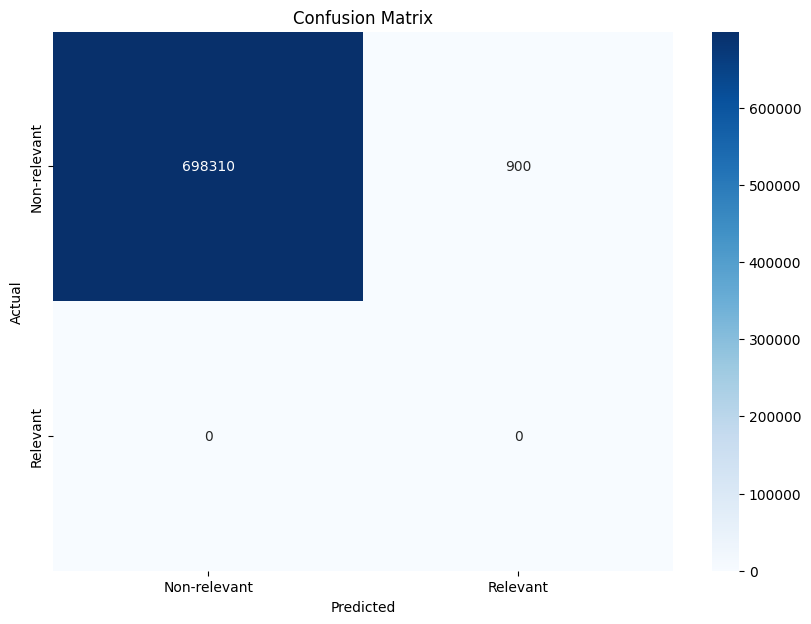

In [43]:
# Step 5: Aggregate results
all_y_true = []
all_y_pred = []

for category, relevant_docs in ground_truth.items():
    predicted_docs = predictions_cosine.get(category, [])
    
    for doc in filenames:
        y_true = 1 if doc in relevant_docs else 0
        y_pred = 1 if doc in predicted_docs else 0
        
        all_y_true.append(y_true)
        all_y_pred.append(y_pred)

# Step 6: Evaluate the model and plot the confusion matrix
cm = confusion_matrix(all_y_true, all_y_pred)
precision = precision_score(all_y_true, all_y_pred, zero_division=0)
recall = recall_score(all_y_true, all_y_pred, zero_division=0)

print(f"Overall Precision: {precision}")
print(f"Overall Recall: {recall}")

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-relevant', 'Relevant'], yticklabels=['Non-relevant', 'Relevant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

5. Vectorizamos los textos usando TFIDF

In [4]:
# Each row represents a document.
# Each column represents a unique token (word) from the corpus.
# Each entry in the matrix represents the TF-IDF score of the token in the corresponding document.
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(all_sentences)


# Print the resulting TF-IDF array
print(X_tfidf.toarray())


# Get feature names (terms)
terms = vectorizer_tfidf.get_feature_names_out()

print(terms)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['0007200' '0008' '001' ... 'zuheir' 'zurich' 'zwermann']


In [5]:
# Convert to DataFrame for readability
tfidf_df = pd.DataFrame(X_tfidf.toarray(), index=filenames, columns=terms)

# Display the TF-IDF array
print("TF-IDF Array:")

tfidf_df

TF-IDF Array:


0007200  0008  001  002  0027  005  0057  00667  007  008  ...  \
15603.txt      0.0   0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0  ...   
15617.txt      0.0   0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0  ...   
15171.txt      0.0   0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0  ...   
16478.txt      0.0   0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0  ...   
19993.txt      0.0   0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0  ...   
...            ...   ...  ...  ...   ...  ...   ...    ...  ...  ...  ...   
16461.txt      0.0   0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0  ...   
16307.txt      0.0   0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0  ...   
20879.txt      0.0   0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0  ...   
19020.txt      0.0   0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0  ...   
16475.txt      0.0   0.0  0.0  0.0   0.0  0.0   0.0    0.0  0.0  0.0  ...   

           zoete  zollinger  zondervan  zondervanltzondo  zone  zones  zoran  \
15603.txt    0.0        0.0        0.0               0.0   0.0    0.0    0.0   
15617.txt    0.0        0.0        0.0               0.0   0.0    0.0    0.0   
15171.txt    0.0        0.0        0.0               0.0   0.0    0.0    0.0   
16478.txt    0.0        0.0        0.0               0.0   0.0    0.0    0.0   
19993.txt    0.0        0.0        0.0               0.0   0.0    0.0    0.0   
...          ...        ...        ...               ...   ...    ...    ...   
16461.txt    0.0        0.0        0.0               0.0   0.0    0.0    0.0   
16307.txt    0.0        0.0        0.0               0.0   0.0    0.0    0.0   
20879.txt    0.0        0.0        0.0               0.0   0.0    0.0    0.0   
19020.txt    0.0        0.0        0.0               0.0   0.0    0.0    0.0   
16475.txt    0.0        0.0        0.0               0.0   0.0    0.0    0.0   

           zuheir  zurich  zwermann  
15603.txt     0.0     0.0       0.0  
15617.txt     0.0     0.0       0.0  
15171.txt     0.0     0.0       0.0  
16478.txt     0.0     0.0       0.0  
19993.txt     0.0     0.0       0.0  
...           ...     ...       ...  
16461.txt     0.0     0.0       0.0  
16307.txt     0.0     0.0       0.0  
20879.txt     0.0     0.0       0.0  
19020.txt     0.0     0.0       0.0  
16475.txt     0.0     0.0       0.0  

[3019 rows x 24500 columns]